In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#build the time series, just a simple AR(1)
t1=[0.1*np.random.normal()]
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())

In [3]:
#build the time series that is granger caused by t1
t2=[item+0.1*np.random.normal() for item in t1]

In [4]:
#adjust t1 and t2
t1=t1[3:]
t2=t2[:-3]

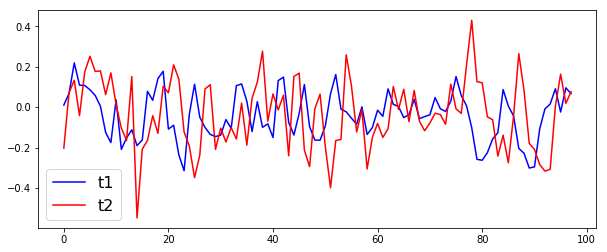

In [5]:
plt.figure(figsize=(10,4))
plt.plot(t1,color='b')
plt.plot(t2,color='r')
plt.legend(['t1','t2'],fontsize=16)

In [6]:
ts_df=pd.DataFrame(columns=['t2','t1'],data=zip(t2,t1))

In [7]:
ts_df#t2 placed at the first Column because we want to see t2 is granger caused by t1

,t2,t1
0,-0.202693,0.010408
1,0.071484,0.067602
2,0.132818,0.218664
3,-0.042065,0.108547
4,0.173518,0.107036
...,...,...
93,-0.307108,0.015131
94,0.005258,0.090891
95,0.162637,-0.024076
96,0.018639,0.095501


In [8]:
gc_res=grangercausalitytests(ts_df,3)#3 Lag


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2603  , p=0.0418  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=4.3963  , p=0.0360  , df=1
likelihood ratio test: chi2=4.2995  , p=0.0381  , df=1
parameter F test:         F=4.2603  , p=0.0418  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.9056 , p=0.0000  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=29.3394 , p=0.0000  , df=2
likelihood ratio test: chi2=25.6010 , p=0.0000  , df=2
parameter F test:         F=13.9056 , p=0.0000  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=47.5557 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=154.0155, p=0.0000  , df=3
likelihood ratio test: chi2=91.5456 , p=0.0000  , df=3
parameter F test:         F=47.5557 , p=0.0000  , df_denom=88, df_num=3


In [ ]:
#We have enough evidence to claim that t1 is causing t2 there are 2 significant lag pvalues